1- TRASNFER LEARNING (THEORY)

2- TRASNFER LEARNING ( PRACTICE)

3- CNN EXAMPLE

4- Project SETUP CNN

https://medium.com/mlearning-ai/transfer-learning-and-convolutional-neural-networks-cnn-e68db4c48cca


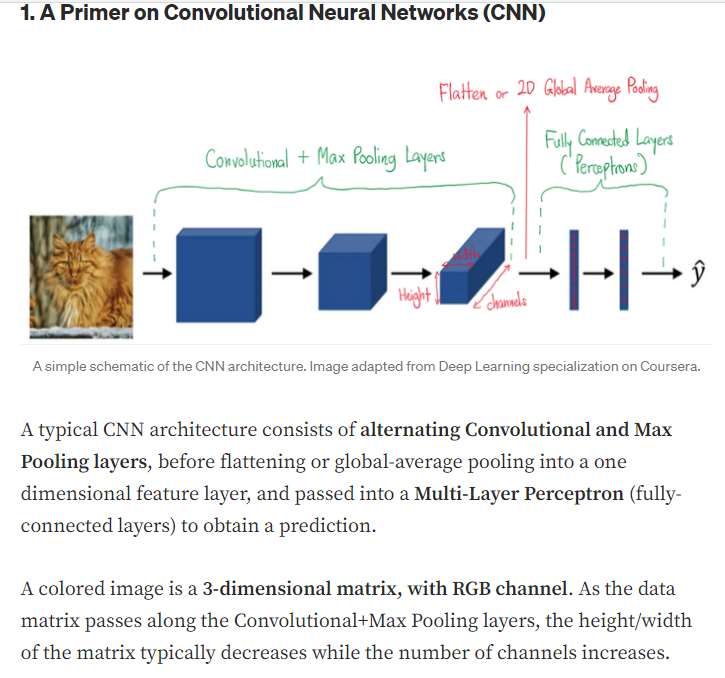

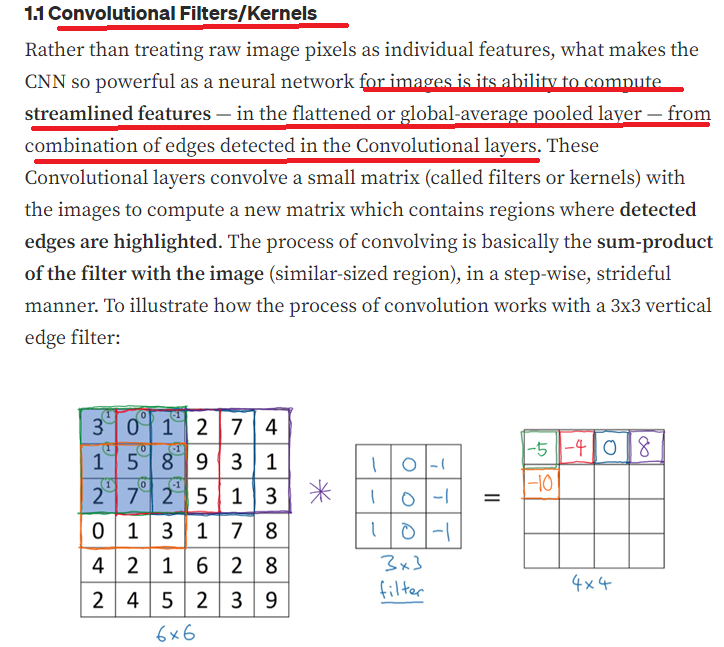

* Convolving a 6x6 matrix with a 3x3 vertical edge filter to obtain a 4x4 matrix. Image adapted from Deep Learning specialization on Coursera.

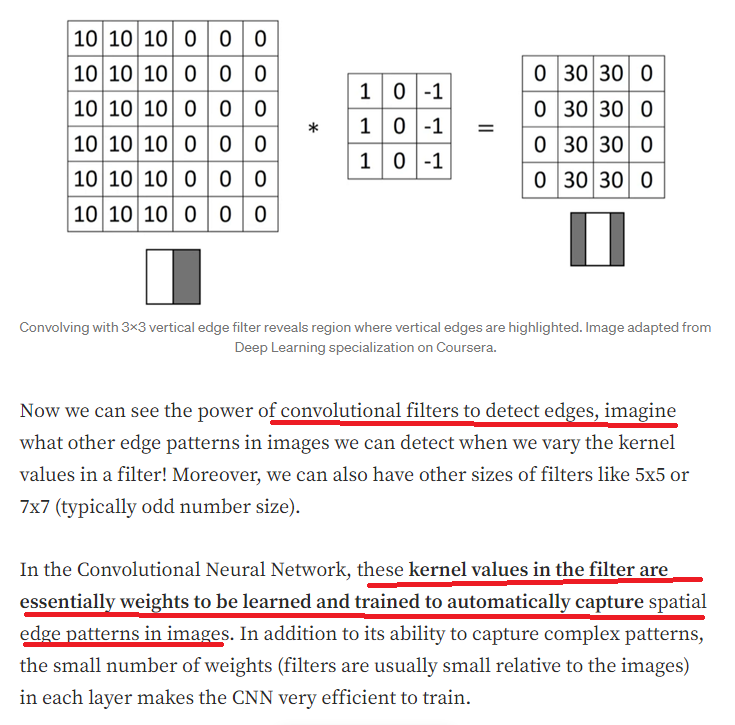

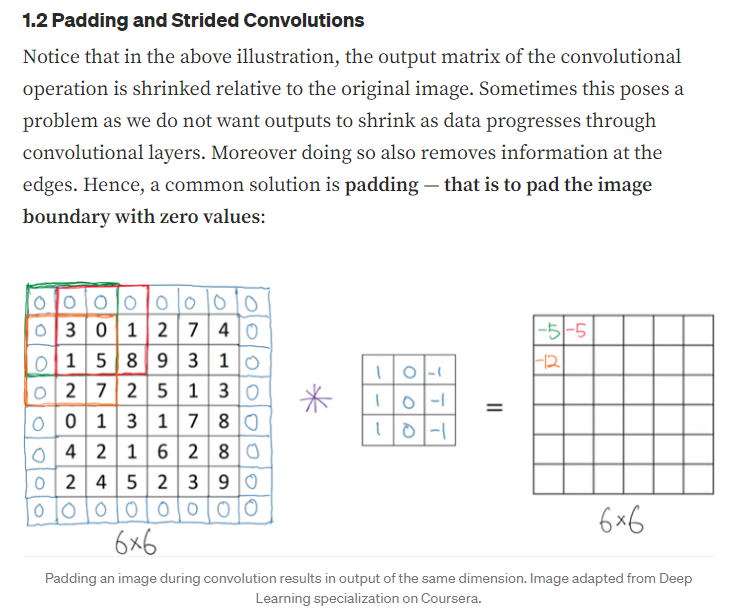

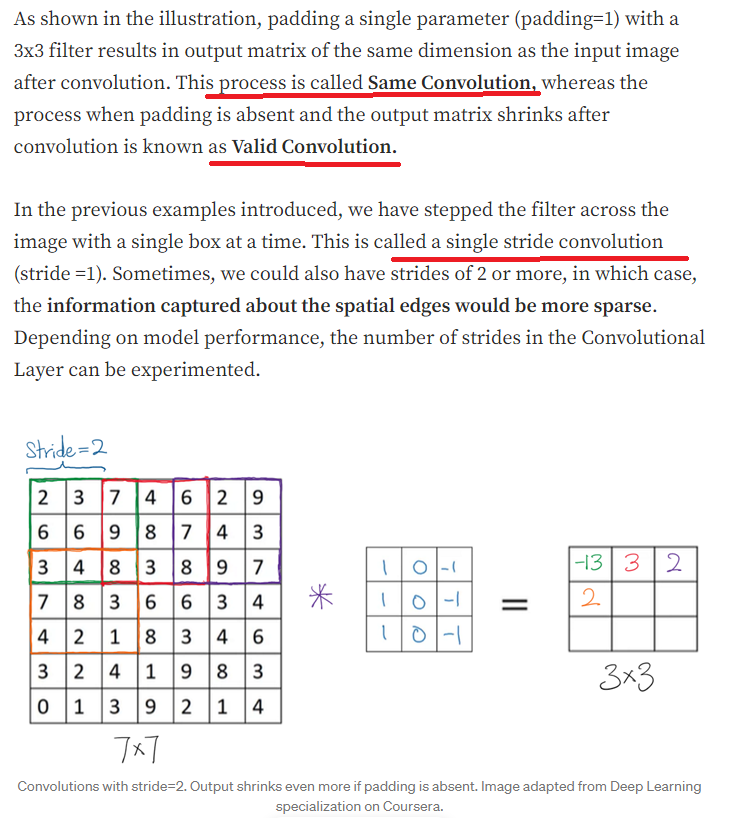

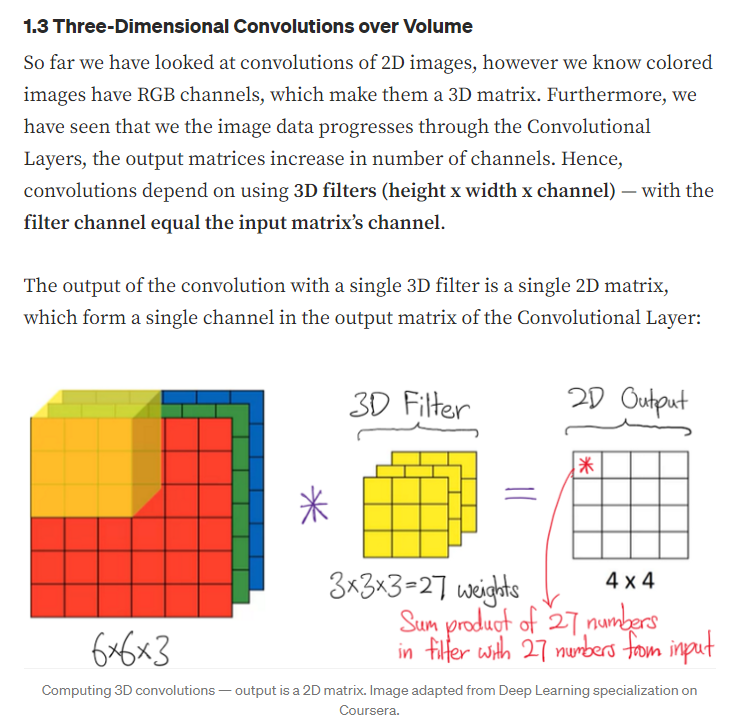

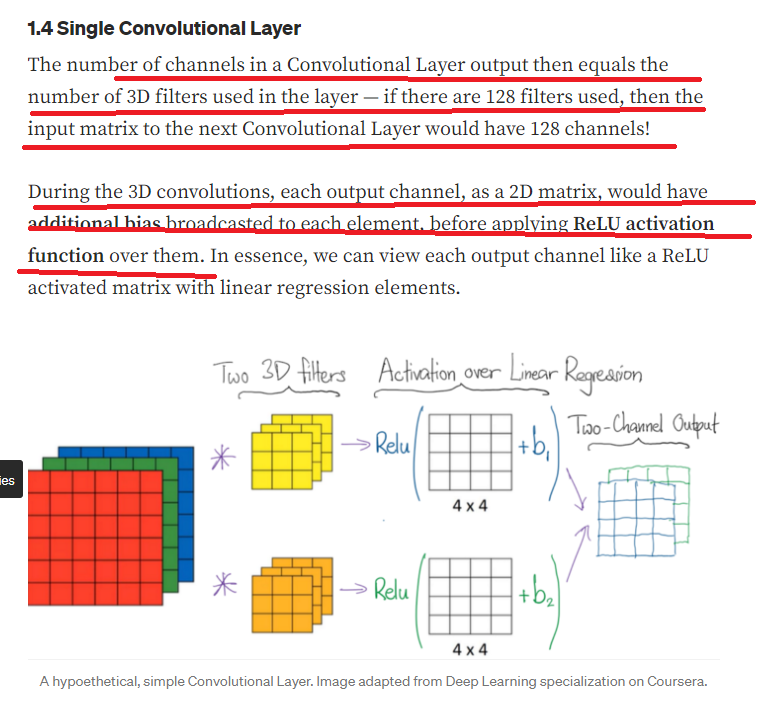

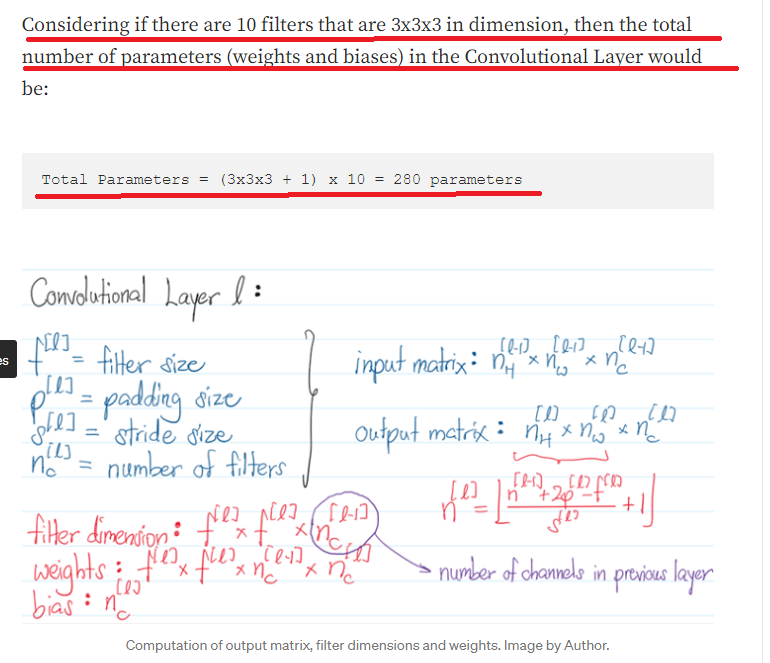


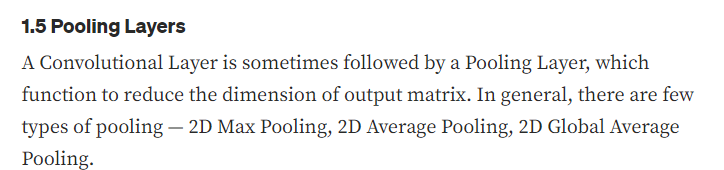

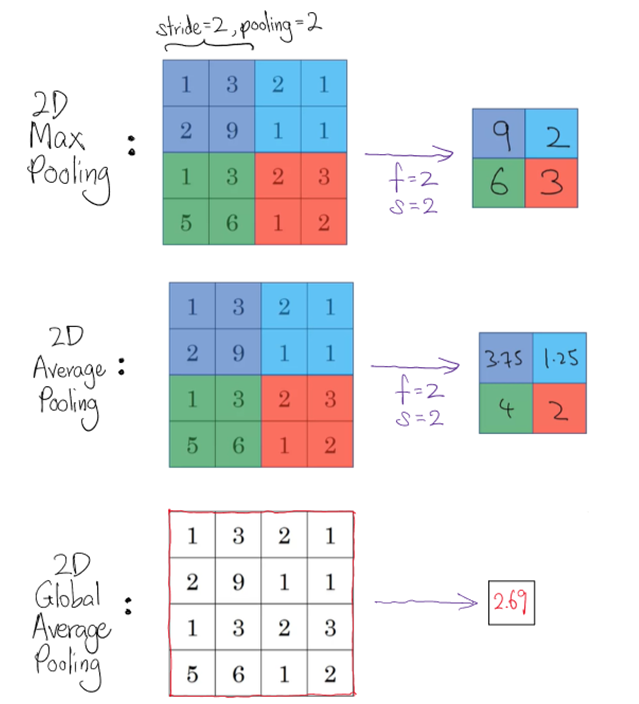

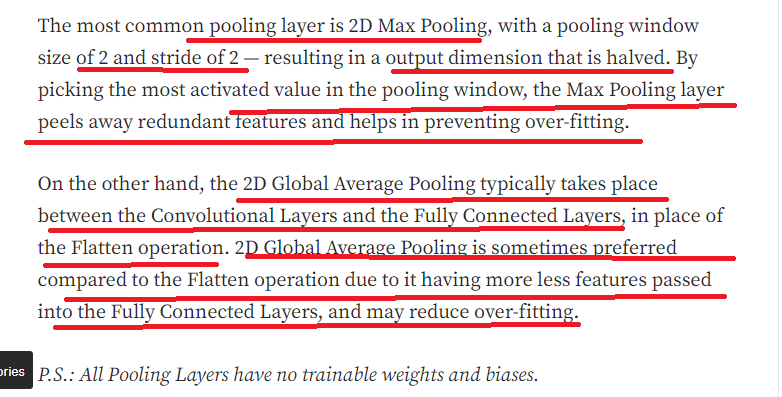

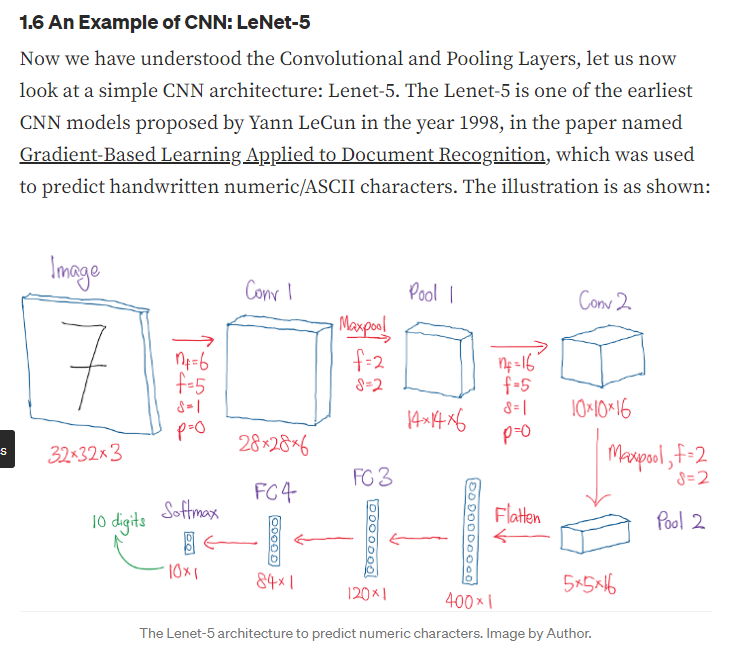

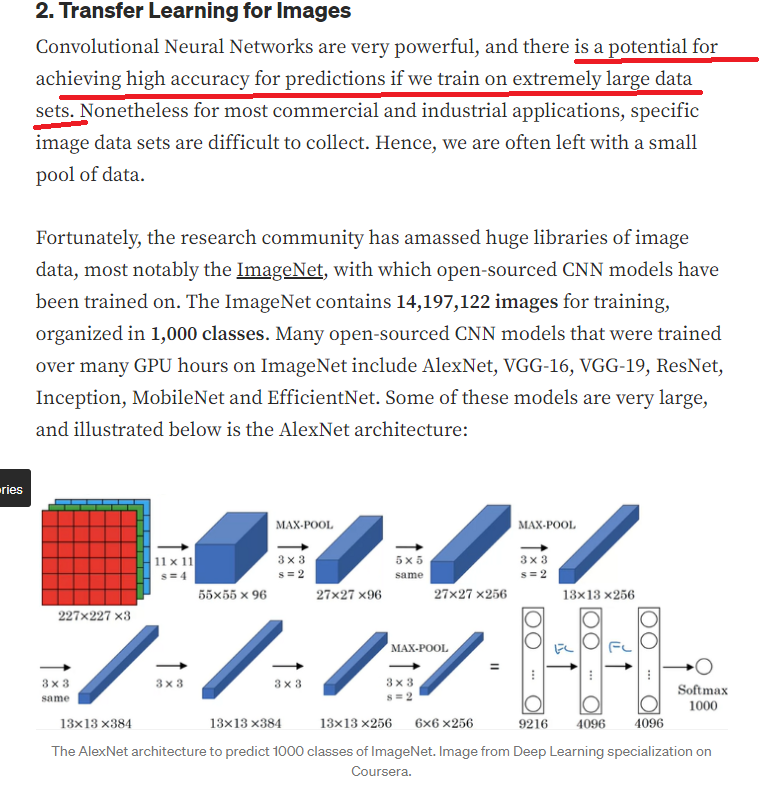

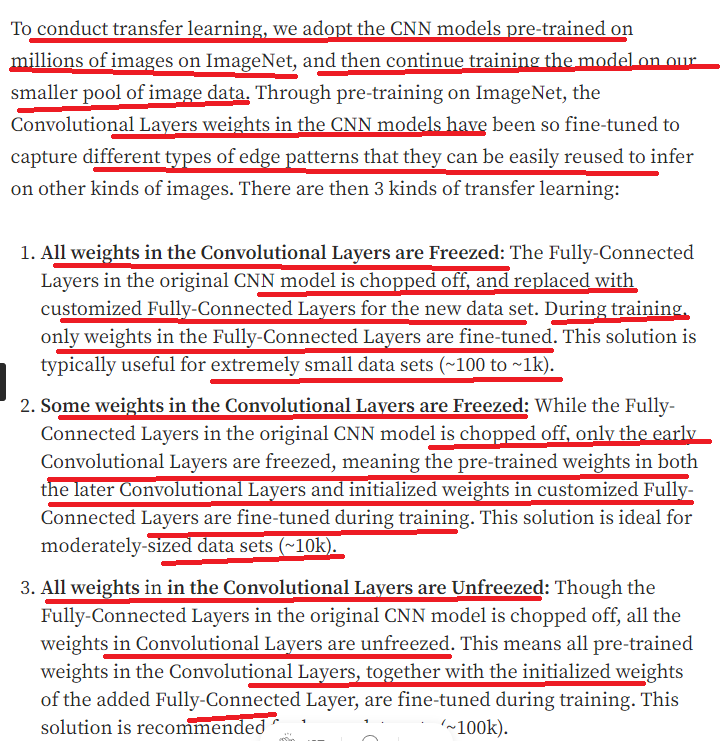

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
mnist = tf.keras.datasets.mnist
mnist

<module 'tensorflow.keras.datasets.mnist' from 'C:\\Users\\rivil\\AppData\\Roaming\\Python\\Python36\\site-packages\\tensorflow\\keras\\datasets\\mnist\\__init__.py'>

In [4]:
(X_train_full, y_train_full),(X_test, y_test)  = mnist.load_data()
print(X_train_full.shape, X_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [6]:
print(X_train_full[0].shape)

(28, 28)


In [8]:
img = X_train_full[0]  # first item
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

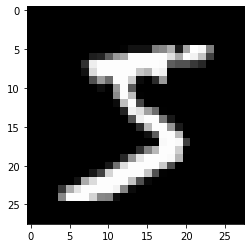

In [11]:
plt.imshow(img, cmap="gray")  # display the lable of the image

In [12]:
label = y_train_full[0]   # label of the first item...
label

5

<AxesSubplot:>

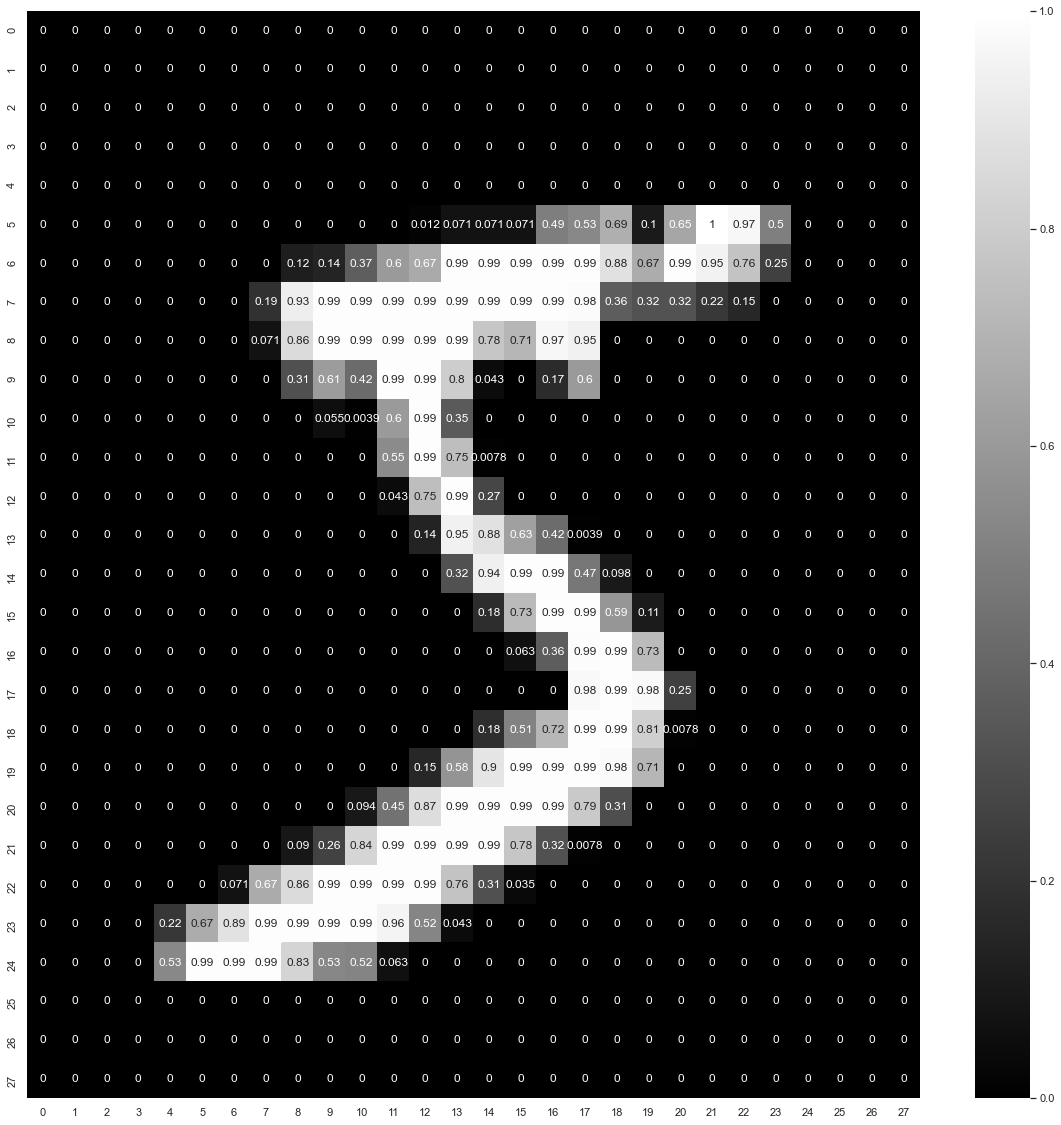

In [19]:
plt.figure(figsize=(20,20))
# using heatmap to represent a matrix (an image in this case) and its values...
sns.heatmap(img/255, annot = True, cmap="gray")


In [21]:
# creates validation dataset

X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255   # normalizing the data for better computation time, easier to find a solution convergence
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
print(X_valid.shape, X_train.shape,y_valid.shape, y_train.shape)

X_test = X_test/255

(5000, 28, 28) (55000, 28, 28) (5000,) (55000,)


In [24]:
np.unique(y_valid), np.unique(y_train)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [25]:
CLASSES = len(np.unique(y_train))
CLASSES

10

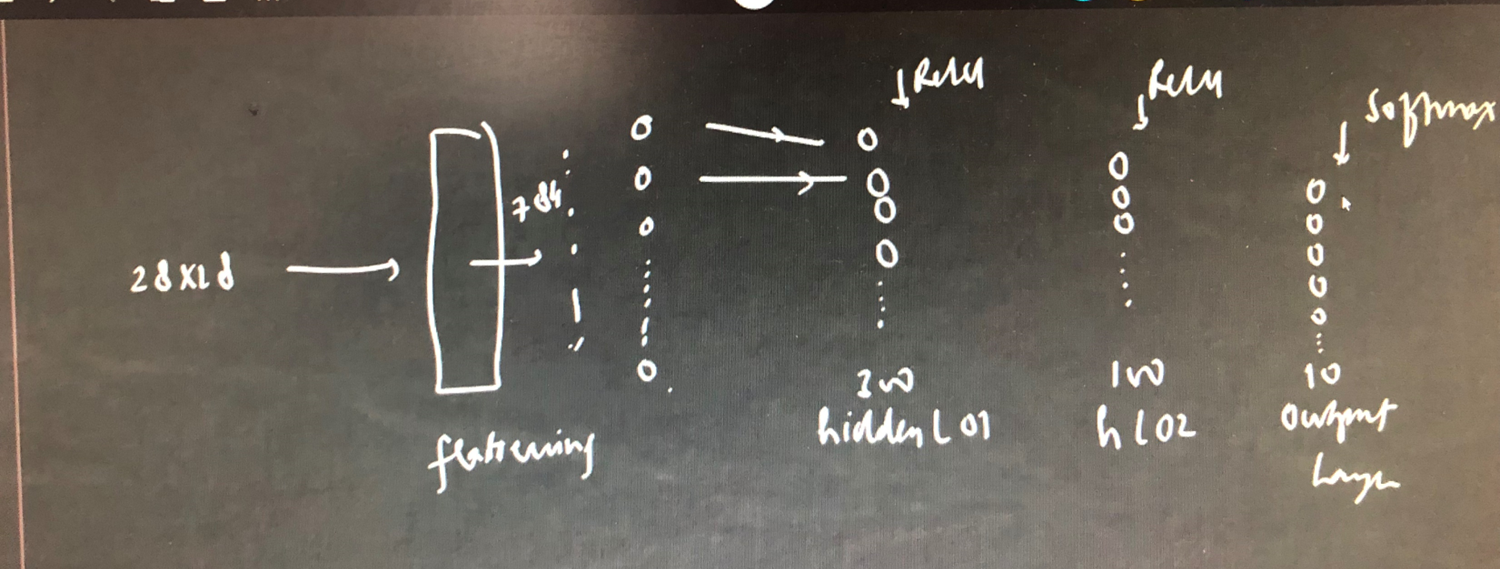

In [26]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28), name = "InputLayer"),
    tf.keras.layers.Dense(300,activation="relu", name="hiddenLayer01"),
    tf.keras.layers.Dense(100,activation="relu", name="hiddenLayer02"),
    tf.keras.layers.Dense(CLASSES,activation="softmax", name="outputLayer")]

In [35]:
model_classifier = tf.keras.models.Sequential(LAYERS)
model_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer01 (Dense)        (None, 300)               235500    
_________________________________________________________________
hiddenLayer02 (Dense)        (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
print("trainable params hidden layer 01 = 28 x 28 x 300 + 300 =", 28*28*300+300)
print("trainable params hidden layer 02 = 300 x 300 x 100 + 100 =", 300*100+100)
print("trainable params output layer = 100 x 10 + 10 =", 100*10+10)
print("total trainable parameters = ",  (28*28*300 + 300)+(300*100 + 100)+(100*10+10))

trainable params hidden layer 01 = 28 x 28 x 300 + 300 = 235500
trainable params hidden layer 02 = 300 x 300 x 100 + 100 = 30100
trainable params output layer = 100 x 10 + 10 = 1010
total trainable parameters =  266610


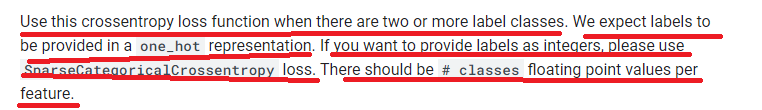

In [38]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS="SGD"
METRICS=["accuracy"]

model_classifier.compile(loss = LOSS_FUNCTION, optimizer= OPTIMIZERS , metrics=METRICS)

In [41]:
X_train.shape

(55000, 28, 28)

In [44]:
print("records per epoch = 55000 / 32 (default Batch_size ) =", X_train.shape[0]/32)

records per epoch = 55000 / 32 (default Batch_size ) = 1718.75


In [40]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)
history = model_classifier.fit(X_train, y_train, epochs = EPOCHS, validation_data = VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0164 - accuracy: 0.7432 - val_loss: 0.3115 - val_accuracy: 0.9148
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.9119 - val_loss: 0.2405 - val_accuracy: 0.9352
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2485 - accuracy: 0.9281 - val_loss: 0.2089 - val_accuracy: 0.9424
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2177 - accuracy: 0.9371 - val_loss: 0.1836 - val_accuracy: 0.9474
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1952 - accuracy: 0.9432 - val_loss: 0.1653 - val_accuracy: 0.9536
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1673 - accuracy: 0.9519 - val_loss: 0.1500 - val_accuracy: 0.9598
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1469 - accuracy: 0.9576 - val_loss: 0.1389 - val_accuracy:

In [45]:
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0   0.611017  0.843218  0.311518        0.9148
1   0.296138  0.915055  0.240542        0.9352
2   0.243986  0.929836  0.208890        0.9424
3   0.209771  0.939582  0.183627        0.9474
4   0.184051  0.946727  0.165303        0.9536
5   0.163185  0.953145  0.150037        0.9598
6   0.146728  0.957564  0.138923        0.9602
7   0.132883  0.962636  0.128292        0.9632
8   0.120520  0.966127  0.121669        0.9652
9   0.110757  0.968927  0.113525        0.9680
10  0.101888  0.971509  0.108887        0.9688
11  0.094166  0.973255  0.103411        0.9708
12  0.087232  0.976109  0.096898        0.9718
13  0.080650  0.977509  0.094129        0.9714
14  0.075005  0.979073  0.089802        0.9726
15  0.070224  0.980327  0.086399        0.9734
16  0.065449  0.981909  0.086425        0.9730
17  0.061314  0.983691  0.082023        0.9732
18  0.057254  0.985073  0.080260        0.9754
19  0.053764  0.985455  0.077209        0.9760
20  0.050328  0.987145  0.077197        0.9766
21  0.047328  0.987691  0.078040        0.9760
22  0.044660  0.988800  0.076286        0.9758
23  0.041802  0.989545  0.073317        0.9770
24  0.039126  0.990182  0.072918        0.9776
25  0.037047  0.990982  0.069946        0.9794
26  0.034931  0.991582  0.068823        0.9796
27  0.032883  0.992345  0.069914        0.9784
28  0.030984  0.993145  0.068258        0.9800
29  0.029251  0.993618  0.068633        0.9804

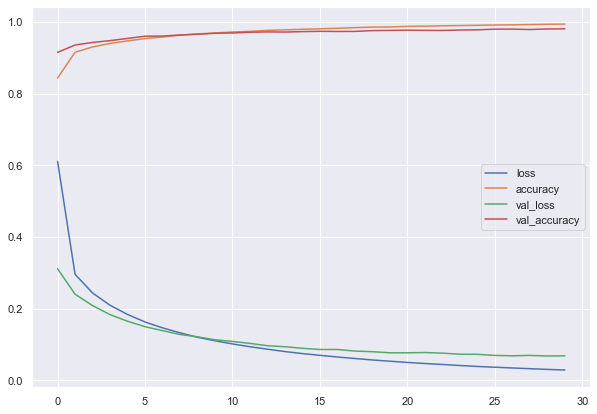

In [46]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [47]:
model_classifier.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0718 - accuracy: 0.9776


[0.07184820622205734, 0.9775999784469604]

In [48]:
print("records per epoch = 10000 (X_test) / 32 (default Batch_size ) =", X_test.shape[0]/32)

records per epoch = 10000 (X_test) / 32 (default Batch_size ) = 312.5


In [50]:
model_classifier.save("mnist_full.h5")

In [52]:
# lets test it

X_new = X_test[:3]
y_prob = model_classifier.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [57]:
y_prob[0].round(3)   # notice that the seventh item has  a value of ONE, which means the probability of ONE for that value to be the number 7.

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

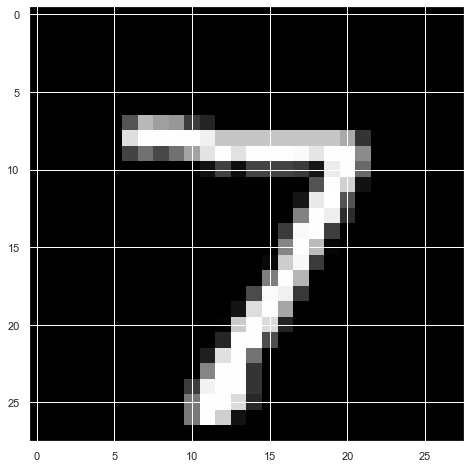

In [54]:
plt.imshow(X_new[0], cmap="gray")   # we can see that the first image of the X_new dataset is the figure with the number 7.

* the prediction was correct

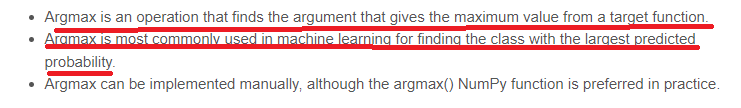

In [59]:
Y_pred = np.argmax(y_prob, axis=-1)  # gives the class with the largest predicted probability, axis=-1 means for each row in the array
Y_pred

array([7, 2, 1], dtype=int64)

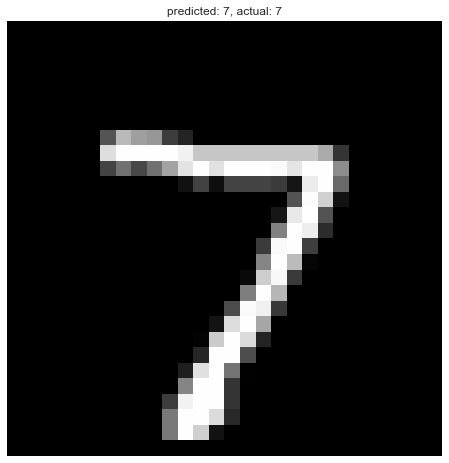

------------------------------------------------------------------------------------------


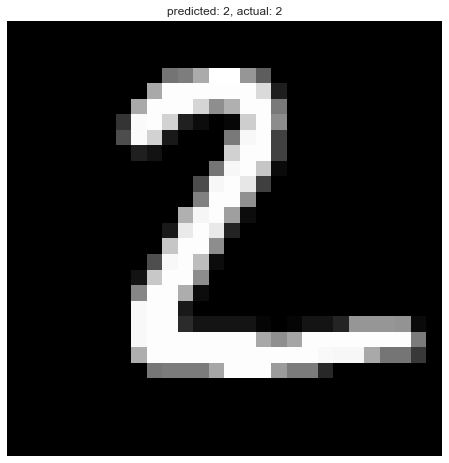

------------------------------------------------------------------------------------------


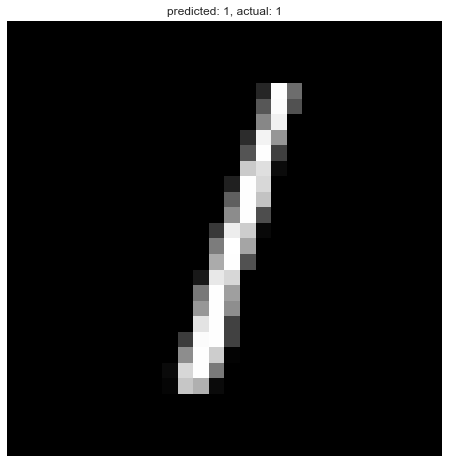

------------------------------------------------------------------------------------------


In [61]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):  # put the info together
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")  
    plt.axis("off")                                            # turn off the axis values
    plt.show()
    print("---"*30)

# TRASNFER LEARNING

## PROBLEM STATEMENT - classify handwritten digits into odd and even

In [62]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")
pretrained_model.summary()  # model has been already created.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer01 (Dense)        (None, 300)               235500    
_________________________________________________________________
hiddenLayer02 (Dense)        (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [65]:
for layer in pretrained_model.layers:   # containes the layers of the model
    print(f"{layer.name}:{layer.trainable}")
    print(f"{layer}")  # objects

InputLayer:True
hiddenLayer01:True
hiddenLayer02:True
outputLayer:True


* if you dont want to retrain all the layers but only the last one for example   - output
* then you have to change the layer.trainable to FALSE and the corresponding weights will be frozen

In [66]:
for layer in pretrained_model.layers[:-1]:   # containes the layers of the model but the last one
    print(f"{layer.name}:{layer.trainable}")
    layer.trainable = False
    print(f"{layer.name}:{layer.trainable}")

InputLayer:True
InputLayer:False
hiddenLayer01:True
hiddenLayer01:False
hiddenLayer02:True
hiddenLayer02:False


In [67]:
# so the first three layers got frozen but the last one

for layer in pretrained_model.layers:   # containes the layers of the model
    print(f"{layer.name}:{layer.trainable}")
    print(f"{layer}")  # objects

InputLayer:False
hiddenLayer01:False
hiddenLayer02:False
outputLayer:True


In [69]:
lower_pretrained_model = pretrained_model.layers[:-1]  # set a variable with the frozen layers
lower_pretrained_model

In [70]:
# creates a new model and add the new output, binary but still can use softmax as an activation function
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add( tf.keras.layers.Dense(2, activation ="softmax" ))
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer01 (Dense)        (None, 300)               235500    
_________________________________________________________________
hiddenLayer02 (Dense)        (None, 100)               30100     
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [73]:
print("trainable params output layer = 100(from previous layer) x 2(binary output) + 2(bias) =", 100*2+2)

trainable params output layer = 100(from previous layer) x 2(binary output) + 2(bias) = 202


* notice that the non-trainable params are from the frozen layers 

In [77]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx]=np.where(label%2==0,1,0)  # 1-even, 0-odd
    return labels


In [78]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])
print(np.unique(y_train_bin))
print(np.unique(y_test_bin))
print(np.unique(y_valid_bin))

[0 1]
[0 1]
[0 1]


In [88]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [90]:
history = new_model.fit(X_train, y_train_bin, epochs=10, validation_data =(X_valid, y_valid_bin) )

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1173 - accuracy: 0.9582 - val_loss: 0.1129 - val_accuracy: 0.9602
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1086 - accuracy: 0.9606 - val_loss: 0.1096 - val_accuracy: 0.9612
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1030 - accuracy: 0.9631 - val_loss: 0.1038 - val_accuracy: 0.9610
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0998 - accuracy: 0.9640 - val_loss: 0.1039 - val_accuracy: 0.9644
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0972 - accuracy: 0.9647 - val_loss: 0.0995 - val_accuracy: 0.9626
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0952 - accuracy: 0.9658 - val_loss: 0.0984 - val_accuracy: 0.9646
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0938 - accuracy: 0.9659 - val_loss: 0.0970 - val_accuracy:

In [91]:
new_model_evaluate = new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 0s 1ms/step - loss: 0.0982 - accuracy: 0.9661


In [93]:
X_new = X_test[:3]
y_prob = new_model.predict(X_new)
y_prob.round(2)

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02]], dtype=float32)

In [94]:
Y_pred = np.argmax(y_prob, axis=-1)  # gives the class with the largest predicted probability, axis=-1 means for each row in the array
Y_pred

array([0, 1, 0], dtype=int64)

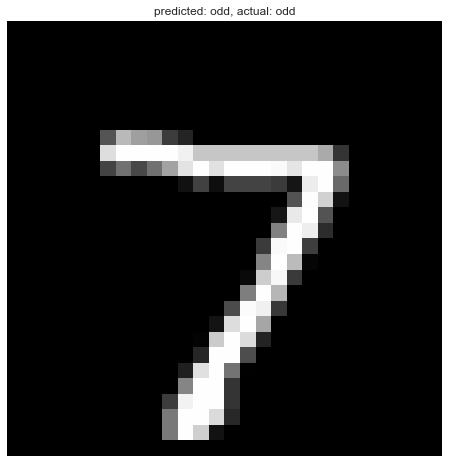

------------------------------------------------------------------------------------------


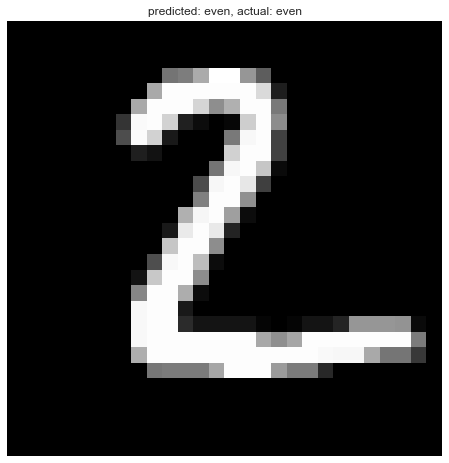

------------------------------------------------------------------------------------------


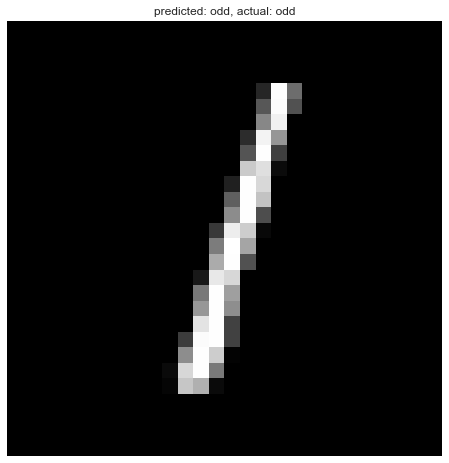

------------------------------------------------------------------------------------------


In [111]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):  # put the info together
    pred = "odd" if pred == 0  else "even"
    actual = "odd" if actual == 0  else "even"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")  
    plt.axis("off")                                            # turn off the axis values
    plt.show()
    print("---"*30)

# CNN MODEL on MNIST DATA - EXAMPLE

In [112]:
X_train[0].shape

(28, 28)

In [116]:
np.expand_dims(X_train,-1).shape  # dimension expanded and located at the last index position

(55000, 28, 28, 1)

In [117]:
np.expand_dims(X_train,-2).shape # dimension expanded and located at the 2nd position from the last 

(55000, 28, 1, 28)

In [113]:
 # expanding the dimensions of the data, the dimension is inserted at the end (index -1) 

X_train_CNN = np.expand_dims(X_train, -1)  
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)
print(X_train_CNN.shape, X_test_CNN.shape, X_valid_CNN.shape)


(55000, 28, 28, 1) (10000, 28, 28, 1) (5000, 28, 28, 1)


In [114]:
X_train_CNN[0].shape

(28, 28, 1)

In [ ]:
input_shape = (28,28,1)   # (row,col,ch)

LAYERS = [
    tf.keras.Input(shape = input_shape),]